<a href="https://colab.research.google.com/github/tamer-elkoT/my_projects1/blob/main/Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the DataSets & EDA

In [ ]:
import pandas as pd
credit_record = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_project/Credit card/credit_record.csv")

application_record = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final_project/Credit card/application_record.csv")

In [ ]:
credit_record.head()


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit_record["STATUS"].value_counts()

,count
STATUS,
C,442031
0,383120
X,209230
1,11090
5,1693
2,868
3,320
4,223


In [ ]:
print("Application Records:", application_record.shape)
print("Credit Records:", credit_record.shape)

Application Records: (438557, 18)
Credit Records: (1048575, 3)


In [ ]:
# Check unique IDs in application_record.csv
unique_ids_application = application_record['ID'].nunique()
print("Unique IDs in Application Records:", unique_ids_application)

# Check unique IDs in credit_record.csv
unique_ids_credit = credit_record['ID'].nunique()
print("Unique IDs in Credit Records:", unique_ids_credit)

Unique IDs in Application Records: 438510
Unique IDs in Credit Records: 45985


C: Closed

X: No loan for the month

0: 1-29 days overdue

1: 30-59 days overdue

2: 60-89 days overdue

3: 90-119 days overdue

4: 120-149 days overdue

5: Overdue or bad

In [ ]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
print("Duplicate IDs in Application Records:", application_record['ID'].duplicated().sum())

Duplicate IDs in Application Records: 47


Find duplicate IDs

In [ ]:
duplicate_ids = application_record[application_record.duplicated(subset="ID",keep=False)]
duplicate_ids = duplicate_ids.sort_values(by="ID")
duplicate_ids

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
425023,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
426818,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
431911,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
431545,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
425486,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
428620,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
421464,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
422068,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


we will group the credit record data based on the ID column >>Knowning that each applicant could have multiple IDs each ID represent the number of months of the credit history however if the applicant has a 24 months it means that it will have 24 rows with the same ID

In [ ]:
duplicated_counts = application_record["ID"].value_counts()
duplicated_counts[duplicated_counts > 1]

,count
ID,
7772847,2
7282535,2
7243768,2
7050948,2
7618285,2
7602432,2
7036518,2
7744386,2
7702238,2


In [ ]:
# Keep the first occurrence of each ID
application_record = application_record.drop_duplicates(subset='ID', keep='first')

In [ ]:
# Check for duplicate IDs
duplicate_ids = application_record['ID'].duplicated().sum()
print("Number of duplicate IDs after removal:", duplicate_ids)

Number of duplicate IDs after removal: 0


Credit age :
Credit age (or credit history length) refers to how long you’ve been using credit. It’s essentially the length of time since you opened your first credit account (e.g., credit card, loan, etc.) until now.

Think of it like this:

If you opened your first credit card 5 years ago, your credit age is 5 years.

If you opened your first loan 10 years ago, your credit age is 10 years.

Credit Record  the credit record is represented by monthly records for each applicant (ID). Each row in credit_record.csv corresponds to a specific month’s credit behavior for an applicant.


In [ ]:
# Aggregate credit records
credit_agg = credit_record.groupby('ID').agg(
    total_months=('STATUS', 'count'),  # Total months of credit history >>Total of rows in the credit history
    late_payments=('STATUS', lambda x: (x.isin(['0', '1', '2', '3', '4', '5'])).sum()),  # Count late payments
    defaults=('STATUS', lambda x: (x == '5').sum()),  # Count defaults
    credit_age_months=('MONTHS_BALANCE', lambda x: x.max() - x.min())  # Credit age in months
).reset_index()


## Total_months VS Credit_age_months
total_months:
Counts the number of months for which credit records exist.

credit_age_months:
Measures the time span between the oldest and most recent records

total_months:

Tells you how much credit history data is available for the applicant.

For example, if total_months is low, the applicant might have a limited credit history.

credit_age_months:

Tells you how long the applicant has been using credit.

For example, if credit_age_months is high, the applicant has a long credit history, which is generally viewed positively by lenders.

In [ ]:
application_record.columns


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [ ]:
credit_agg.head()

,ID,total_months,late_payments,defaults,credit_age_months
0,5001711,4,3,0,3
1,5001712,19,10,0,18
2,5001713,22,0,0,21
3,5001714,15,0,0,14
4,5001715,60,0,0,59


In [ ]:
credit_agg.shape

(45985, 5)

In [ ]:
application_record.shape


(438510, 18)

The Mismatch problem . If an applicant exists in application_record but not in credit_agg (i.e., they have no credit history), the columns from credit_agg will have missing values (NaN) for that row.

In [ ]:
# Merge the two datasets
merged_data = application_record.merge(credit_agg, on="ID",how="left")
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,16.0,2.0,0.0,15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,15.0,2.0,0.0,14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,1,0,0,0,Security staff,2.0,30.0,7.0,0.0,29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,5.0,2.0,0.0,4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,0,1,1,Sales staff,1.0,5.0,0.0,0.0,4.0


## Create the Target variable

In [ ]:
# Define the target variable
def define_target(status_series):
  # If the applicant has ever defaulted
  if (status_series == "5").any():
    return "bad"
  # If the applicant has more than 2 late payments
  elif (status_series.isin(['0', '1', '2', '3', '4'])).sum() > 2 :
    return "bad"
  else:
    return "good"


In [ ]:
# Apply the function to each applicant
target = credit_record.groupby("ID")["STATUS"].apply(define_target)

In [ ]:
# Merge the target variable with the application data
merged_data["TARGET"] = merged_data["ID"].map(target)


In [ ]:
merged_data["TARGET"].value_counts()

,count
TARGET,
bad,28113
good,8344


In [ ]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,16.0,2.0,0.0,15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,15.0,2.0,0.0,14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,30.0,7.0,0.0,29.0,bad
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,5.0,2.0,0.0,4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,5.0,0.0,0.0,4.0,good


## Handle Missing data for applicants with no credit history

In [ ]:
merged_data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


Why Are There So Many Missing Values?
The large number of missing values in total_months, late_payments, defaults, credit_age_months, and TARGET is because:

392,525 applicants have no credit history, so their credit-related columns will have missing values after merging.

This is expected behavior because not all applicants will have credit history records.

In [ ]:
# Handling missing values in Occupation type column
merged_data["OCCUPATION_TYPE"].fillna("Unkown",inplace = True)

<ipython-input-26-b32a69b597b2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data["OCCUPATION_TYPE"].fillna("Unkown",inplace = True)


Fill credit-related columns with 0

In [ ]:
# Fill missing values for applicants with no credit history
credit_history_columns = ["total_months", "late_payments", "defaults", "credit_age_months"]
for col in credit_history_columns:
  merged_data[col].fillna(0,inplace = True)



<ipython-input-27-b3b16468521f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data[col].fillna(0,inplace = True)


In [ ]:
merged_data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0




```

```

**assume applicants with no credit history are low-risk**

In [ ]:
# Fill Nan values in the target column with "good"
merged_data["TARGET"].fillna("good",inplace =True)

<ipython-input-29-9da816fa2d69>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data["TARGET"].fillna("good",inplace =True)


In [ ]:
merged_data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
merged_data["TARGET"].value_counts()

,count
TARGET,
good,410397
bad,28113


## Handle outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns_df = merged_data.select_dtypes(include=["number"])
numerical_columns_df = numerical_columns_df.drop(["ID"],axis = 1)
numerical_columns = numerical_columns_df.columns
numerical_columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'total_months', 'late_payments', 'defaults',
       'credit_age_months'],
      dtype='object')

In [ ]:
numerical_columns_df.dtypes

,0
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
DAYS_BIRTH,int64
DAYS_EMPLOYED,int64
FLAG_MOBIL,int64
FLAG_WORK_PHONE,int64
FLAG_PHONE,int64
FLAG_EMAIL,int64
CNT_FAM_MEMBERS,float64
total_months,float64


## Handle The Outliers

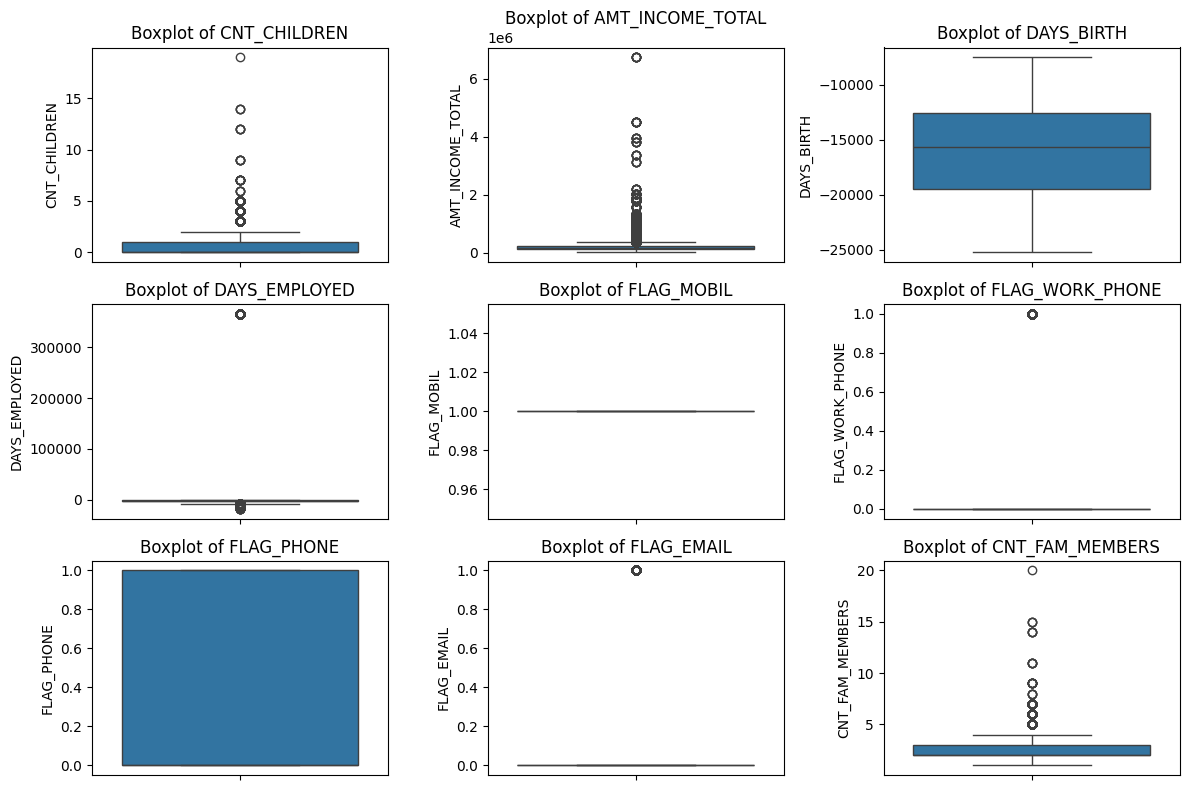

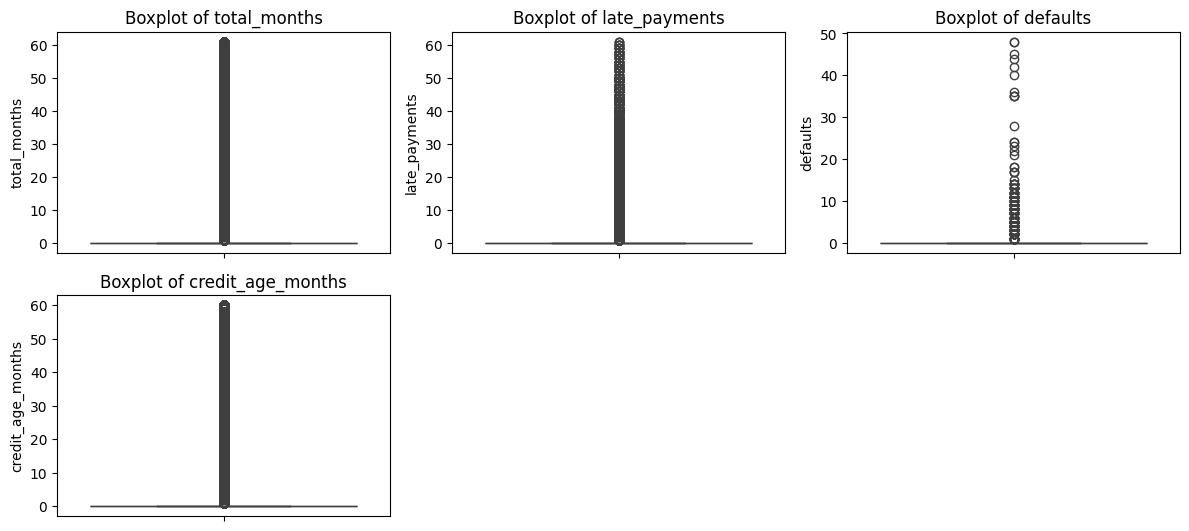

In [ ]:
columns_per_figure = 9
for fig_idx in range(0,len(numerical_columns),columns_per_figure):

  plt.figure(figsize=(12,8))

  for i , col in enumerate(numerical_columns[fig_idx:fig_idx + columns_per_figure],1):
    plt.subplot(3,3,i)
    sns.boxplot(y=merged_data[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)

    plt.tight_layout()
  plt.show()

In [ ]:
def cap_outliers(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1- 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else x)
  return df

In [ ]:
for col in numerical_columns:
  merged_data_capped = cap_outliers(merged_data,col)
print(type(merged_data_capped))

<class 'pandas.core.frame.DataFrame'>


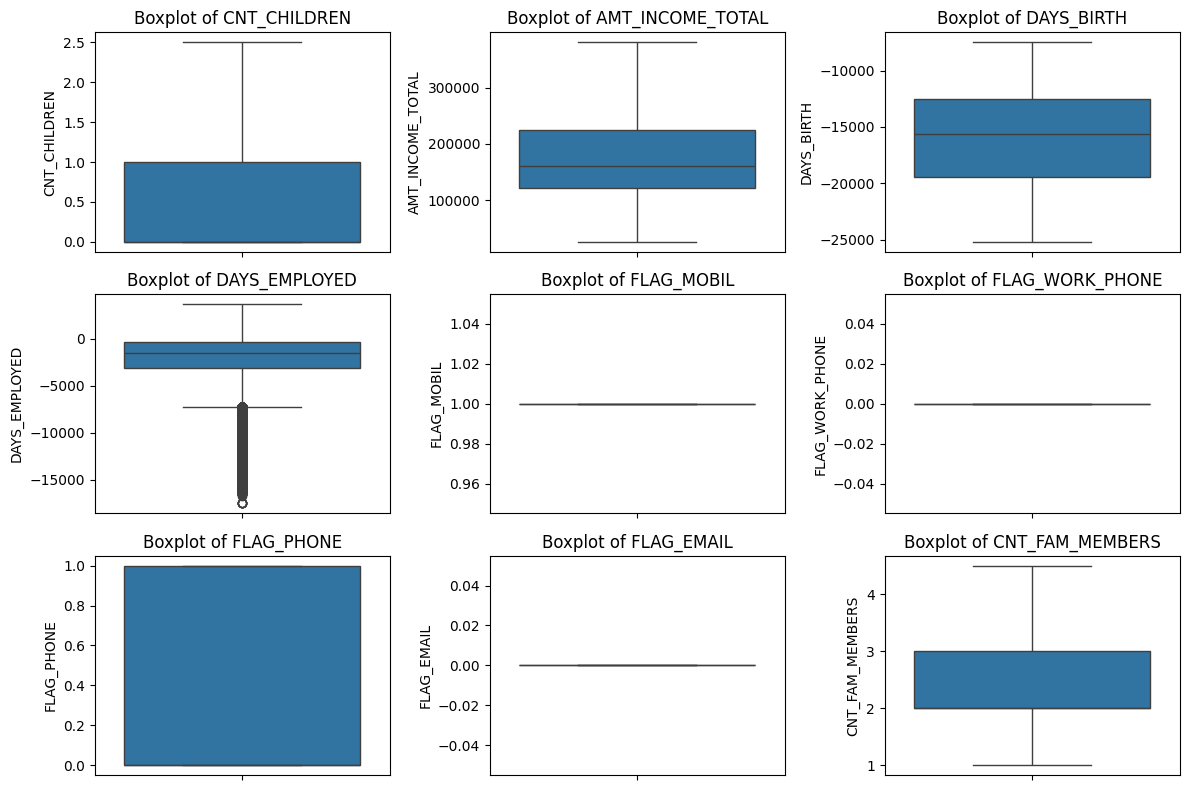

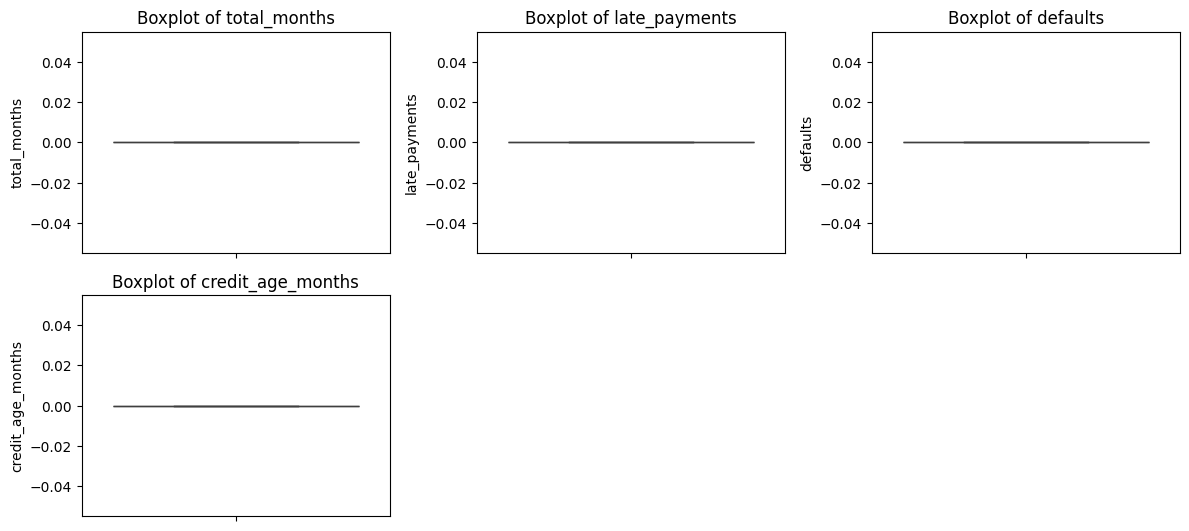

In [ ]:
columns_per_figure = 9
for fig_idx in range(0,len(numerical_columns),columns_per_figure):

  plt.figure(figsize=(12,8))

  for i , col in enumerate(numerical_columns[fig_idx:fig_idx + columns_per_figure],1):
    plt.subplot(3,3,i)
    sns.boxplot(y=merged_data_capped[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)

    plt.tight_layout()
  plt.show()

Cap the outliers with the upper/lower bounds

## Split the Data

In [ ]:
from sklearn.model_selection import train_test_split
X = merged_data.drop(["ID","TARGET"],axis = 1)
y = merged_data["TARGET"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_capped = merged_data_capped.drop(["ID","TARGET"],axis = 1)
y_capped = merged_data_capped["TARGET"]

X_train_capped,X_test_capped,y_train_capped,y_test_capped = train_test_split(X_capped,y_capped,test_size = 0.2,random_state=42,stratify=y)

<ipython-input-40-85081f014548>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])


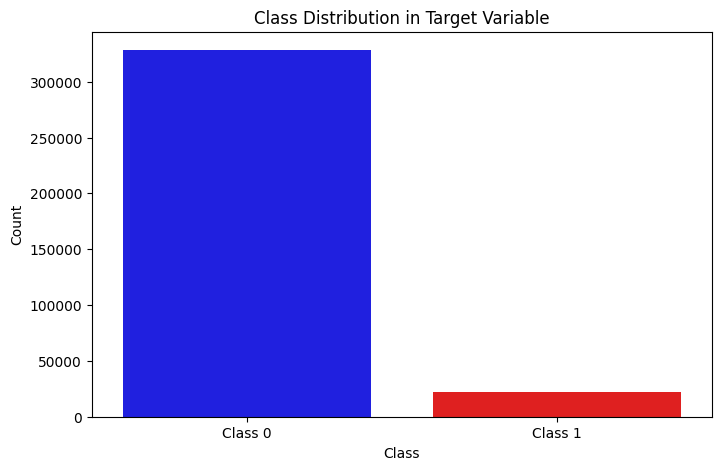

In [ ]:


# Count the number of occurrences of each class
class_counts = y_train.value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["blue", "red"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.show()


<ipython-input-41-1ecc9a88b304>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts_capped.values, palette=["blue", "red"])


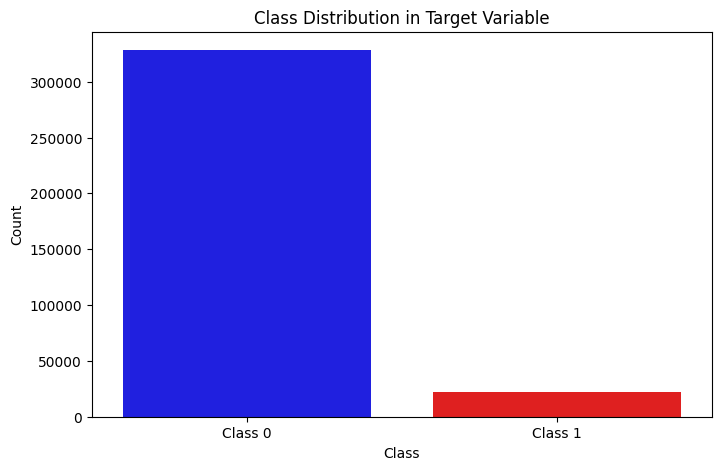

In [ ]:


# Count the number of occurrences of each class
class_counts_capped = y_train_capped.value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts_capped.values, palette=["blue", "red"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.show()


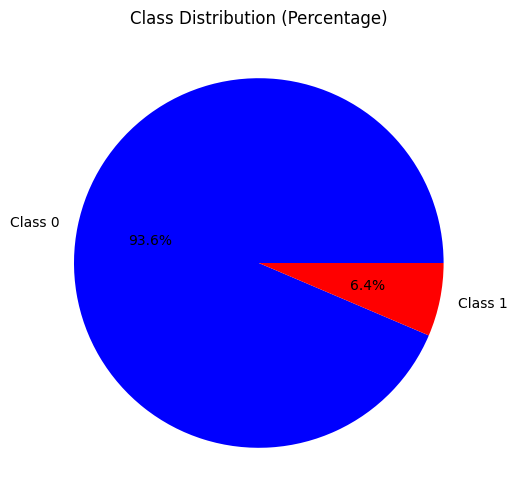

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=["Class 0", "Class 1"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Class Distribution (Percentage)")
plt.show()

There are an imbalance in the data !!!


## Feature Engineering

In [ ]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months,TARGET
0,5008804,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,...,0.0,0,0.0,Unkown,2.0,0.0,0.0,0.0,0.0,good
1,5008805,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,...,0.0,0,0.0,Unkown,2.0,0.0,0.0,0.0,0.0,good
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0.0,0,0.0,Security staff,2.0,0.0,0.0,0.0,0.0,bad
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0.0,1,0.0,Sales staff,1.0,0.0,0.0,0.0,0.0,good
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0.0,1,0.0,Sales staff,1.0,0.0,0.0,0.0,0.0,good


In [ ]:
merged_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'total_months',
       'late_payments', 'defaults', 'credit_age_months', 'TARGET'],
      dtype='object')

## Data preprocessing

Age: Convert DAYS_BIRTH to years

In [ ]:
merged_data["AGE"] = abs(merged_data["DAYS_BIRTH"])/365

Convert DAYS_EMPLOYED to years

In [ ]:
merged_data["YEARS_EMPLOYED"] = abs(merged_data["DAYS_EMPLOYED"])/365

 Calculate income per family member:

In [ ]:
merged_data["INCOME_PER_FAMILY_MEMBER"] = merged_data["AMT_INCOME_TOTAL"]/merged_data["CNT_FAM_MEMBERS"]

## Drop Unnecessary columns

In [ ]:
merged_data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis =1 , inplace = True)

In [ ]:
merged_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months,TARGET,AGE,YEARS_EMPLOYED,INCOME_PER_FAMILY_MEMBER
0,5008804,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,...,Unkown,2.0,0.0,0.0,0.0,0.0,good,32.890411,12.443836,190125.0
1,5008805,M,Y,Y,0.0,380250.0,Working,Higher education,Civil marriage,Rented apartment,...,Unkown,2.0,0.0,0.0,0.0,0.0,good,32.890411,12.443836,190125.0
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2.0,0.0,0.0,0.0,0.0,bad,58.832877,3.106849,56250.0
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,0.0,0.0,0.0,0.0,good,52.356164,8.358904,270000.0
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,0.0,0.0,0.0,0.0,good,52.356164,8.358904,270000.0


## Encoding the categorical features

In [ ]:
merged_data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'total_months', 'late_payments', 'defaults',
       'credit_age_months', 'TARGET', 'AGE', 'YEARS_EMPLOYED',
       'INCOME_PER_FAMILY_MEMBER'],
      dtype='object')

For 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY' columns

In [ ]:
merged_data["CODE_GENDER"].value_counts()


,count
CODE_GENDER,
F,294406
M,144104


In [ ]:
# Define mappings for each column
gender_mapping = {'M': 1, 'F': 0}
car_mapping = {'Y': 1, 'N': 0}
realty_mapping = {'Y': 1, 'N': 0}

In [ ]:
# Apply the mappings to the columns
X_train['CODE_GENDER'] = X_train['CODE_GENDER'].apply(lambda x: gender_mapping[x])
X_train['FLAG_OWN_CAR'] = X_train['FLAG_OWN_CAR'].apply(lambda x: car_mapping[x])
X_train['FLAG_OWN_REALTY'] = X_train['FLAG_OWN_REALTY'].apply(lambda x: realty_mapping[x])

# Apply the same mappings to the test set
X_test['CODE_GENDER'] = X_test['CODE_GENDER'].apply(lambda x: gender_mapping[x])
X_test['FLAG_OWN_CAR'] = X_test['FLAG_OWN_CAR'].apply(lambda x: car_mapping[x])
X_test['FLAG_OWN_REALTY'] = X_test['FLAG_OWN_REALTY'].apply(lambda x: realty_mapping[x])

In [ ]:
X_train["FLAG_OWN_REALTY"].value_counts()

,count
FLAG_OWN_REALTY,
1,243243
0,107565


In [ ]:
X_train["CNT_CHILDREN"].value_counts()

,count
CNT_CHILDREN,
0.0,243090
1.0,70951
2.0,31935
2.5,4832


Remove childern that are higher than 5

In [ ]:
# Remove rows where CNT_CHILDREN > 5
X_train = X_train[X_train['CNT_CHILDREN'] <= 5]
y_train = y_train[X_train.index]  # Ensure the target variable is also filtered

In [ ]:
print("Value counts after removal:")
print(X_train["CNT_CHILDREN"].value_counts())

Value counts after removal:
CNT_CHILDREN
0.0    243090
1.0     70951
2.0     31935
2.5      4832
Name: count, dtype: int64


In [ ]:
X_train["NAME_INCOME_TYPE"].value_counts()

,count
NAME_INCOME_TYPE,
Working,181045
Commercial associate,80577
Pensioner,60146
State servant,29024
Student,16


In [ ]:
# Remove rows where NAME_INCOME_TYPE is "Student"
X_train = X_train[X_train['NAME_INCOME_TYPE'] != 'Student']
y_train = y_train[X_train.index]  # Ensure the target variable is also filtered

X_test = X_test[X_test['NAME_INCOME_TYPE'] != 'Student']
y_test = y_test[X_test.index]  # Ensure the target variable is also filtered

In [ ]:
X_train.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'total_months',
       'late_payments', 'defaults', 'credit_age_months'],
      dtype='object')

In [ ]:
# One-hot encode NAME_INCOME_TYPE
X_train = pd.get_dummies(X_train, columns=['NAME_INCOME_TYPE'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['NAME_INCOME_TYPE'], drop_first=True)

In [ ]:
# Ensure X_train and X_test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
X_train["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,241421
Higher education,93987
Incomplete higher,11876
Lower secondary,3249
Academic degree,259


In [ ]:
X_train = X_train[X_train['NAME_EDUCATION_TYPE'] != 'Academic degree']
y_train = y_train[X_train.index]  # Ensure the target variable is also filtered

X_test = X_test[X_test['NAME_EDUCATION_TYPE'] != 'Academic degree']
y_test = y_test[X_test.index]

In [ ]:
X_train["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,241421
Higher education,93987
Incomplete higher,11876
Lower secondary,3249


In [ ]:
# Define the order of categories
education_order = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education']

# Create a mapping dictionary
education_mapping = {level: i for i, level in enumerate(education_order)}

# Apply ordinal encoding
X_train['NAME_EDUCATION_TYPE'] = X_train['NAME_EDUCATION_TYPE'].map(education_mapping)
X_test['NAME_EDUCATION_TYPE'] = X_test['NAME_EDUCATION_TYPE'].map(education_mapping)

In [ ]:
X_train["NAME_EDUCATION_TYPE"].value_counts()

,count
NAME_EDUCATION_TYPE,
1,241421
3,93987
2,11876
0,3249


In [ ]:
X_train["NAME_FAMILY_STATUS"].value_counts()

,count
NAME_FAMILY_STATUS,
Married,239626
Single / not married,44274
Civil marriage,29171
Separated,21742
Widow,15720


In [ ]:
# Using one-hot encoding
X_train = pd.get_dummies(X_train, columns = ["NAME_FAMILY_STATUS"],drop_first= True)
X_test = pd.get_dummies(X_test,columns = ["NAME_FAMILY_STATUS"],drop_first=True)


In [ ]:
X_train["NAME_HOUSING_TYPE"].value_counts()

,count
NAME_HOUSING_TYPE,
House / apartment,314677
With parents,15327
Municipal apartment,11411
Rented apartment,4768
Office apartment,3114
Co-op apartment,1236


In [ ]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,late_payments,defaults,credit_age_months,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
313835,0,0,1,0.0,135000.0,1,House / apartment,-9982,-1366.0,1,...,0.0,0.0,0.0,False,False,True,False,True,False,False
178126,0,1,1,1.0,112500.0,1,House / apartment,-11889,-749.0,1,...,0.0,0.0,0.0,False,False,True,True,False,False,False
106183,1,1,1,0.0,315000.0,3,House / apartment,-13998,-824.0,1,...,0.0,0.0,0.0,False,False,False,False,False,False,False
355148,1,0,1,0.0,168750.0,1,House / apartment,-8542,-845.0,1,...,0.0,0.0,0.0,False,False,True,False,False,True,False
16606,1,1,1,1.0,292500.0,3,House / apartment,-12569,-3322.0,1,...,0.0,0.0,0.0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373584,0,1,1,0.0,261000.0,3,House / apartment,-10254,-1152.0,1,...,0.0,0.0,0.0,False,False,True,True,False,False,False
377628,0,0,1,0.0,225000.0,1,House / apartment,-22083,3727.0,1,...,0.0,0.0,0.0,True,False,False,True,False,False,False
61441,1,1,1,1.0,292500.0,3,House / apartment,-12595,-1966.0,1,...,0.0,0.0,0.0,False,False,False,True,False,False,False
359706,0,0,1,0.0,112500.0,1,House / apartment,-23555,3727.0,1,...,0.0,0.0,0.0,True,False,False,False,False,False,True


In [ ]:
# Group by housing type and calculate mean income
housing_income = X_train.groupby("NAME_HOUSING_TYPE")["AMT_INCOME_TOTAL"].mean().sort_values(ascending=False)

# Display the result
print("Mean Income by Housing Type:")
print(housing_income)

Mean Income by Housing Type:
NAME_HOUSING_TYPE
Office apartment       205346.387283
Rented apartment       187149.022966
Municipal apartment    184739.511918
Co-op apartment        184597.208738
House / apartment      181915.975976
With parents           173972.453423
Name: AMT_INCOME_TOTAL, dtype: float64


In [ ]:
# Group by housing type and calculate mean income
housing_income_capped = X_train_capped.groupby("NAME_HOUSING_TYPE")["AMT_INCOME_TOTAL"].mean().sort_values(ascending=False)

<ipython-input-82-e46510110a2c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=housing_income.index, y=housing_income.values, palette="viridis")


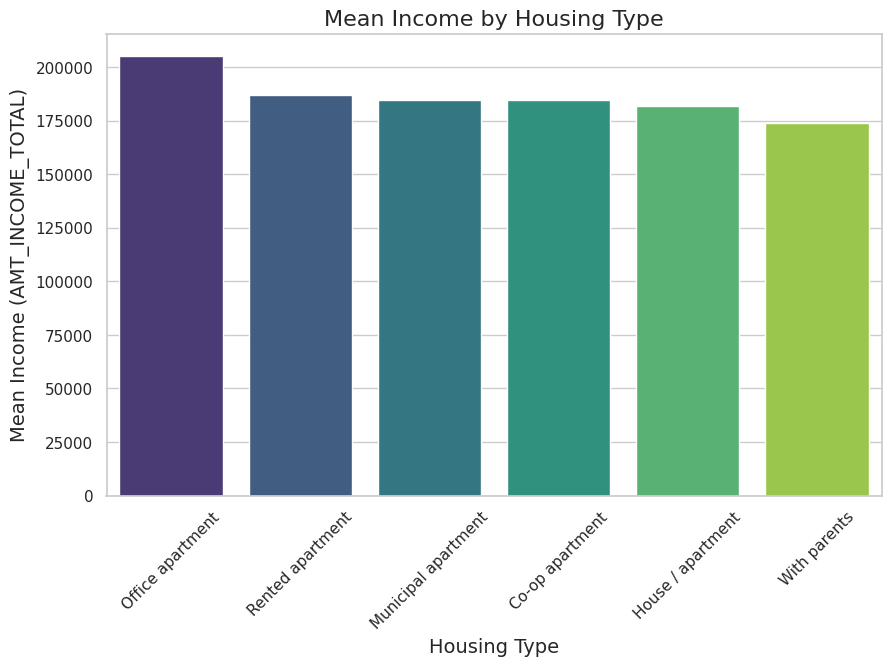

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=housing_income.index, y=housing_income.values, palette="viridis")
plt.title("Mean Income by Housing Type", fontsize=16)
plt.xlabel("Housing Type", fontsize=14)
plt.ylabel("Mean Income (AMT_INCOME_TOTAL)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train["OCCUPATION_TYPE"].value_counts()


,count
OCCUPATION_TYPE,
Unkown,107207
Laborers,62557
Core staff,34367
Sales staff,32848
Managers,28268
Drivers,20903
High skill tech staff,13799
Accountants,12748
Medicine staff,10832


In [ ]:
y_train


,TARGET
313835,good
178126,good
106183,good
355148,good
16606,good
...,...
373584,good
377628,good
61441,good
359706,good


In [ ]:
target_mapping = {'good':0,"bad":1}
y_train_numeric = y_train.map(target_mapping)
y_test_numeric = y_test.map(target_mapping)

In [ ]:
target_mapping = {'good':0,"bad":1}
y_train_numeric_capped = y_train_capped.map(target_mapping)
y_test_numeric_capped = y_test_capped.map(target_mapping)

In [ ]:
skill_level_mapping = {
    "Laborers": "Low Skill",
    "Low-skill Laborers": "Low Skill",
    "Cleaning staff": "Low Skill",
    "Cooking staff": "Low Skill",
    "Security staff": "Low Skill",
    "Waiters/barmen staff": "Low Skill",
    "Core staff": "Medium Skill",
    "Sales staff": "Medium Skill",
    "Drivers": "Medium Skill",
    "Secretaries": "Medium Skill",
    "Private service staff": "Medium Skill",
    "Managers": "High Skill",
    "High skill tech staff": "High Skill",
    "Accountants": "High Skill",
    "Medicine staff": "High Skill",
    "Realty agents": "High Skill",
    "HR staff": "High Skill",
    "IT staff": "High Skill",
    "Unknown": "Unknown"
}

In [ ]:
X_train["SKILL_LEVEL"] = X_train["OCCUPATION_TYPE"].map(skill_level_mapping)
X_test["SKILL_LEVEL"] = X_test["OCCUPATION_TYPE"].map(skill_level_mapping)

In [ ]:
X_train_capped["SKILL_LEVEL"] = X_train_capped["OCCUPATION_TYPE"].map(skill_level_mapping)
X_test_capped["SKILL_LEVEL"] = X_test_capped["OCCUPATION_TYPE"].map(skill_level_mapping)

In [ ]:
temp_df=X_train.copy()
temp_df["TARGET"] = y_train_numeric

<ipython-input-92-839f14138554>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_level_target.index,y=skill_level_target.values,palette="viridis")


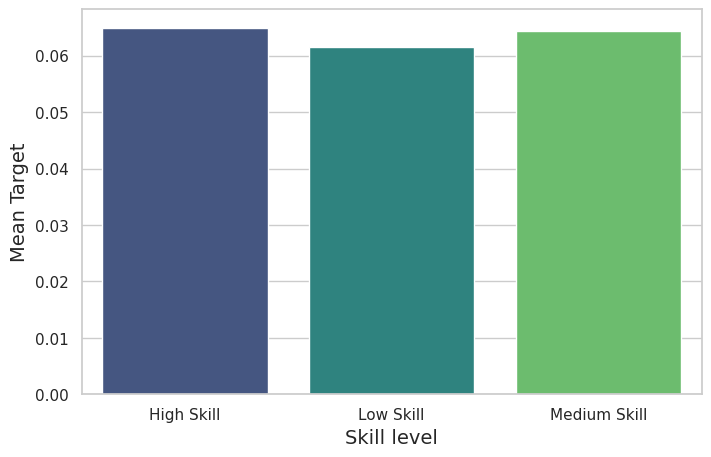

In [ ]:
skill_level_target = temp_df.groupby("SKILL_LEVEL")["TARGET"].mean()
plt.figure(figsize=(8,5))
sns.barplot(x=skill_level_target.index,y=skill_level_target.values,palette="viridis")
plt.xlabel("Skill level",fontsize =14)
plt.ylabel("Mean Target",fontsize =14)
plt.show()

In [ ]:
X_train["SKILL_LEVEL"].value_counts()

,count
SKILL_LEVEL,
Medium Skill,92554
Low Skill,83144
High Skill,67628


In [ ]:
skill_level_mapping = {
    "Low Skill": 0,
    "Medium Skill": 1,
    "High Skill": 2
}

In [ ]:
X_train["SKILL_LEVEL_encoded"] = X_train["SKILL_LEVEL"].map(skill_level_mapping)
X_test["SKILL_LEVEL_encoded"] = X_test["SKILL_LEVEL"].map(skill_level_mapping)

In [ ]:
X_train_capped["SKILL_LEVEL_encoded"] = X_train_capped["SKILL_LEVEL"].map(skill_level_mapping)
X_test_capped["SKILL_LEVEL_encoded"] = X_test_capped["SKILL_LEVEL"].map(skill_level_mapping)

In [ ]:
X_train = X_train.drop(["OCCUPATION_TYPE","SKILL_LEVEL"],axis = 1)
X_test = X_test.drop(["OCCUPATION_TYPE","SKILL_LEVEL"],axis = 1)

In [ ]:
X_train_capped = X_train_capped.drop(["OCCUPATION_TYPE","SKILL_LEVEL"],axis = 1)
X_test_capped = X_test_capped.drop(["OCCUPATION_TYPE","SKILL_LEVEL"],axis = 1)

In [ ]:
X_train.dtypes

,0
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
CNT_CHILDREN,float64
AMT_INCOME_TOTAL,float64
NAME_EDUCATION_TYPE,int64
NAME_HOUSING_TYPE,object
DAYS_BIRTH,int64
DAYS_EMPLOYED,float64
FLAG_MOBIL,int64


In [ ]:
X_train["NAME_HOUSING_TYPE"].value_counts()

,count
NAME_HOUSING_TYPE,
House / apartment,314677
With parents,15327
Municipal apartment,11411
Rented apartment,4768
Office apartment,3114
Co-op apartment,1236


In [ ]:
X_train_encoded = pd.get_dummies(X_train,columns=["NAME_HOUSING_TYPE"],drop_first=True)
X_test_encoded = pd.get_dummies(X_test,columns=["NAME_HOUSING_TYPE"],drop_first=True)

In [ ]:
X_train_encoded_capped = pd.get_dummies(X_train_capped,columns=["NAME_HOUSING_TYPE"],drop_first=True)
X_test_encoded_capped = pd.get_dummies(X_test_capped,columns=["NAME_HOUSING_TYPE"],drop_first=True)

In [ ]:
X_train_encoded.dtypes

,0
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
CNT_CHILDREN,float64
AMT_INCOME_TOTAL,float64
NAME_EDUCATION_TYPE,int64
DAYS_BIRTH,int64
DAYS_EMPLOYED,float64
FLAG_MOBIL,int64
FLAG_WORK_PHONE,float64


In [ ]:
X_train_encoded.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,SKILL_LEVEL_encoded,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
313835,0,0,1,0.0,135000.0,1,-9982,-1366.0,1,0.0,...,False,True,False,False,0.0,True,False,False,False,False
178126,0,1,1,1.0,112500.0,1,-11889,-749.0,1,0.0,...,True,False,False,False,NaN,True,False,False,False,False
106183,1,1,1,0.0,315000.0,3,-13998,-824.0,1,0.0,...,False,False,False,False,2.0,True,False,False,False,False
355148,1,0,1,0.0,168750.0,1,-8542,-845.0,1,0.0,...,False,False,True,False,0.0,True,False,False,False,False
16606,1,1,1,1.0,292500.0,3,-12569,-3322.0,1,0.0,...,True,False,False,False,NaN,True,False,False,False,False


In [ ]:
X_train_encoded.describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,total_months,late_payments,defaults,credit_age_months,SKILL_LEVEL_encoded
count,350533.000000,350533.000000,350533.000000,350533.000000,350533.00000,350533.000000,350533.000000,350533.000000,350533.0,350533.0,350533.000000,350533.0,350533.000000,350533.0,350533.0,350533.0,350533.0,243326.000000
mean,0.328594,0.372193,0.693290,0.418848,181949.34365,1.560863,-15990.680541,-1534.210625,1.0,0.0,0.287616,0.0,2.186301,0.0,0.0,0.0,0.0,0.936234
std,0.469703,0.483390,0.461129,0.690844,80811.71745,0.895035,4184.350126,3238.681505,0.0,0.0,0.452652,0.0,0.869575,0.0,0.0,0.0,0.0,0.784580
min,0.000000,0.000000,0.000000,0.000000,26100.00000,0.000000,-25201.000000,-17531.000000,1.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,121500.00000,1.000000,-19470.000000,-3101.000000,1.0,0.0,0.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,1.000000,0.000000,157500.00000,1.000000,-15622.000000,-1468.000000,1.0,0.0,0.000000,0.0,2.000000,0.0,0.0,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,225000.00000,3.000000,-12510.000000,-373.000000,1.0,0.0,1.000000,0.0,3.000000,0.0,0.0,0.0,0.0,2.000000
max,1.000000,1.000000,1.000000,2.500000,380250.00000,3.000000,-7678.000000,3727.000000,1.0,0.0,1.000000,0.0,4.500000,0.0,0.0,0.0,0.0,2.000000


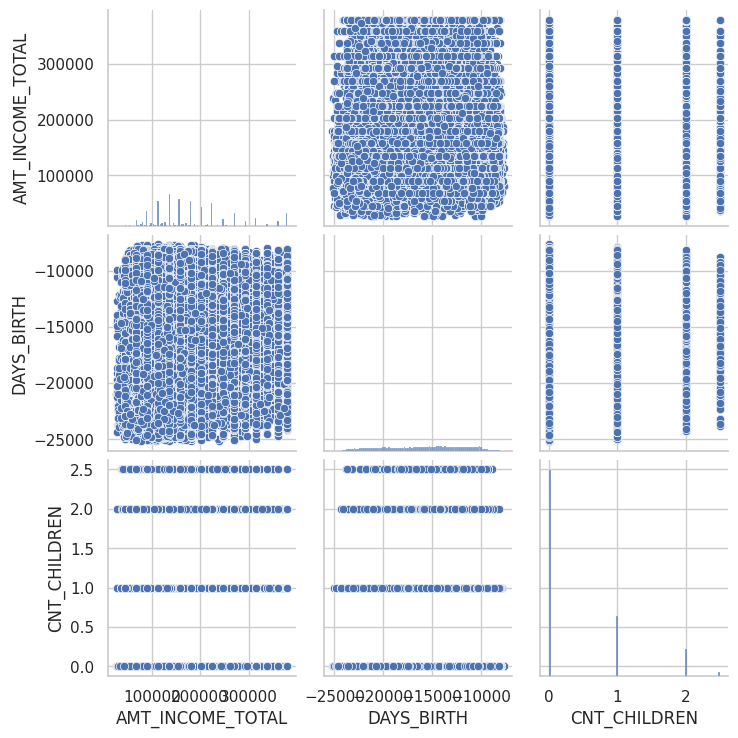

In [ ]:
sns.pairplot(X_train_encoded[["AMT_INCOME_TOTAL", "DAYS_BIRTH", "CNT_CHILDREN"]])
plt.show()


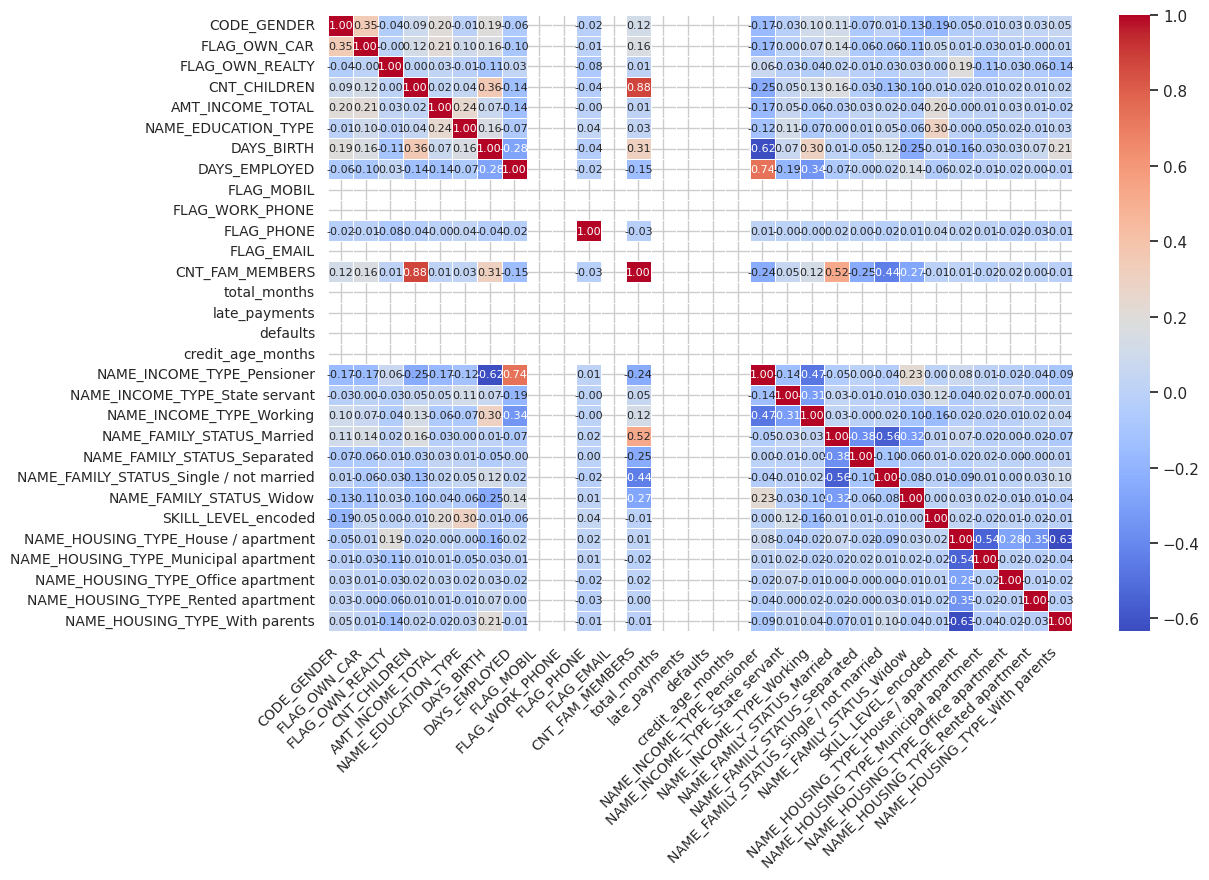

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_encoded.corr(), annot=True,fmt=".2f", cmap='coolwarm',linewidths=0.5,annot_kws={"size":8})
plt.xticks(rotation=45,ha="right",fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
X_train.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'total_months',
       'late_payments', 'defaults', 'credit_age_months',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'SKILL_LEVEL_encoded'],
      dtype='object')

## Handle Nan Values

In [ ]:
X_train_encoded.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_EDUCATION_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
FLAG_MOBIL,0
FLAG_WORK_PHONE,0


In [ ]:
median_value = X_train_encoded["SKILL_LEVEL_encoded"].median()
X_train_encoded["SKILL_LEVEL_encoded"].fillna(median_value,inplace = True)

<ipython-input-110-ab30bfbeba37>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_encoded["SKILL_LEVEL_encoded"].fillna(median_value,inplace = True)


In [ ]:
X_train_encoded.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_EDUCATION_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
FLAG_MOBIL,0
FLAG_WORK_PHONE,0


In [ ]:
binary_columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL',
                  'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
one_hot_columns = ['NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
                   'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Married',
                   'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married',
                   'NAME_FAMILY_STATUS_Widow']

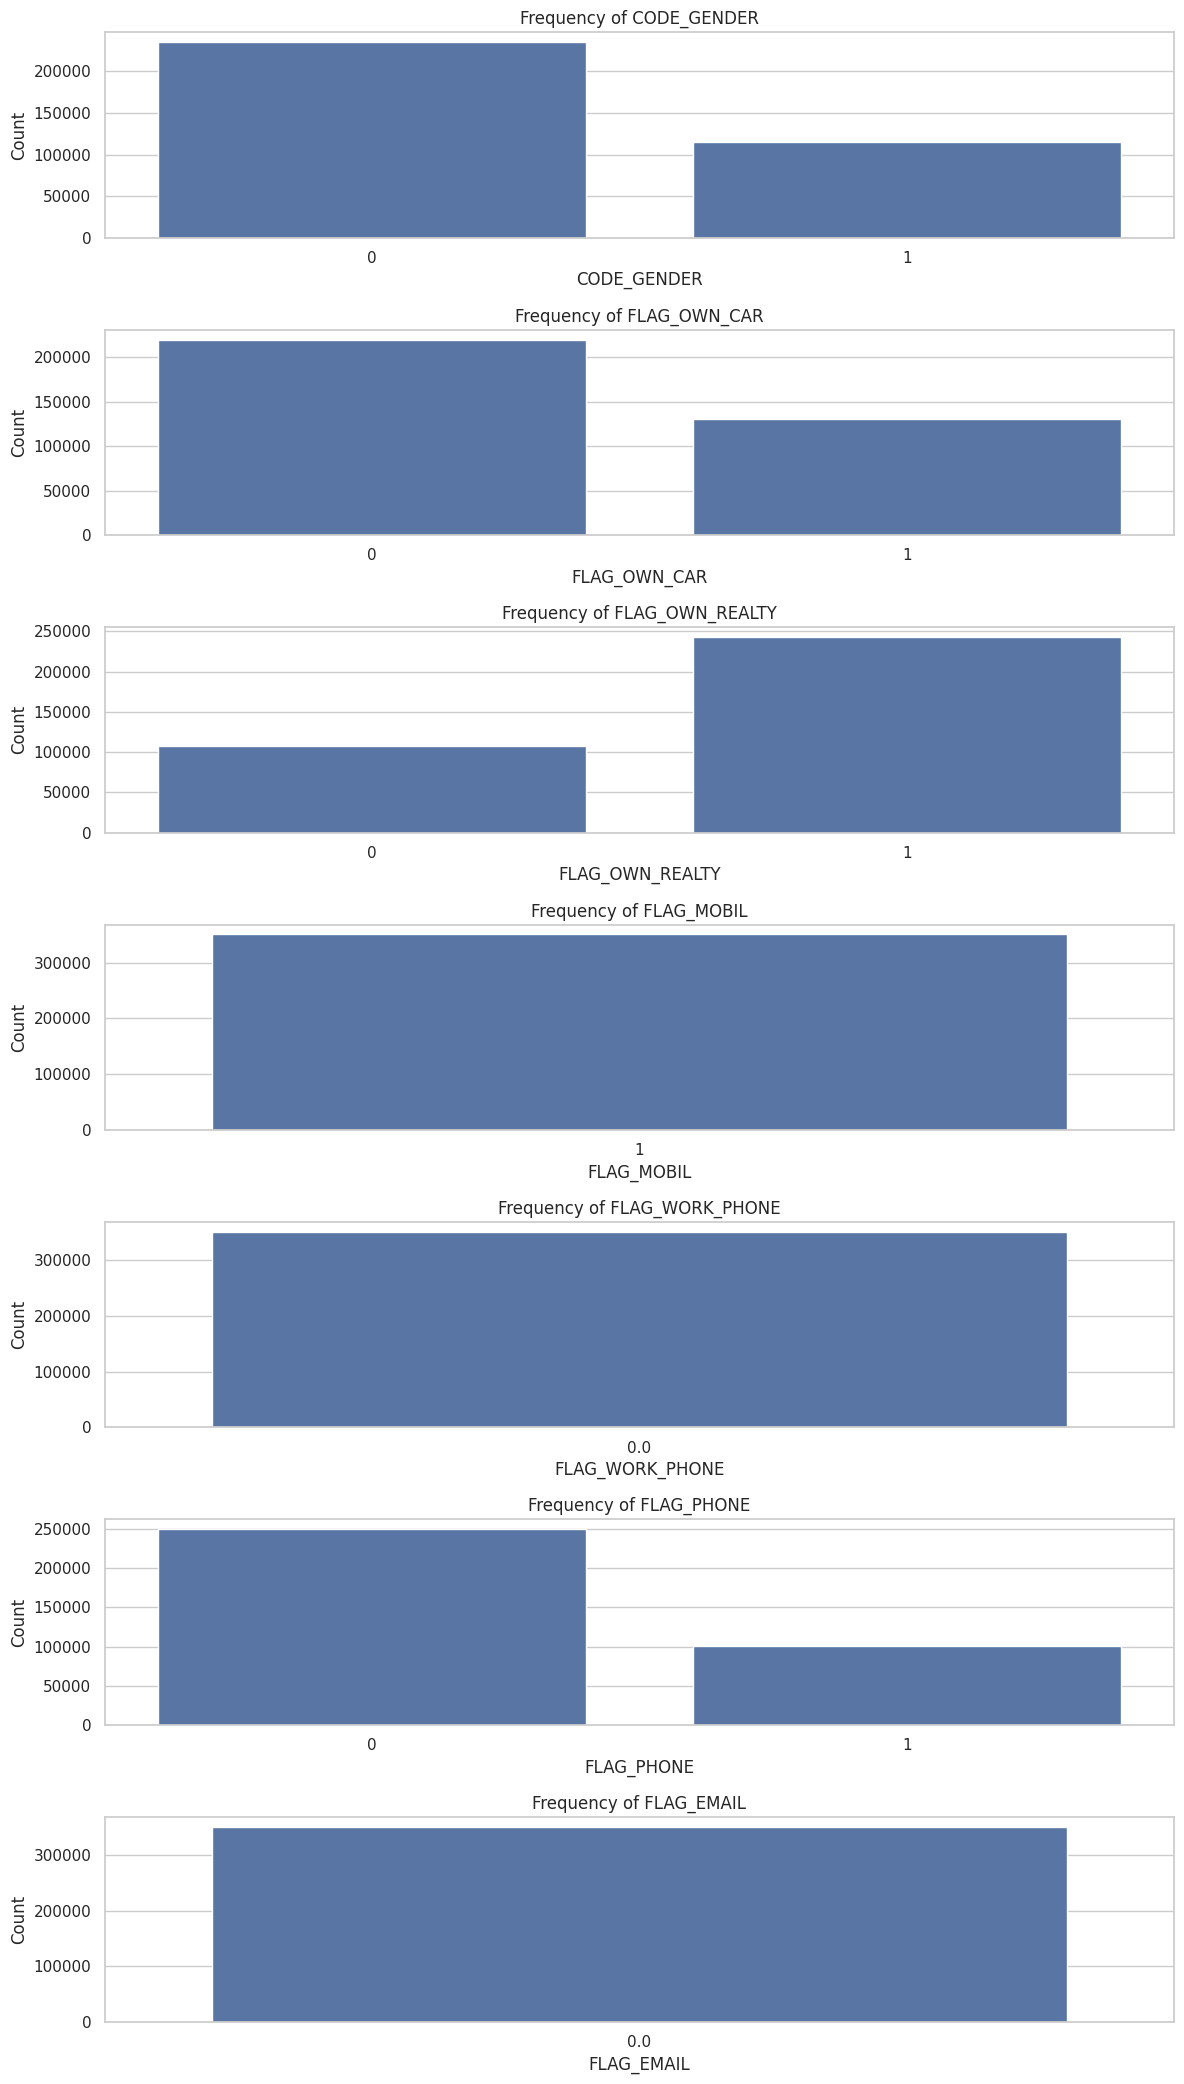

In [ ]:
# Bar Plots for Binary Features
plt.figure(figsize=(12, len(binary_columns) * 3))
for i, col in enumerate(binary_columns, 1):
    plt.subplot(len(binary_columns), 1, i)
    sns.countplot(x=X_train[col])
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

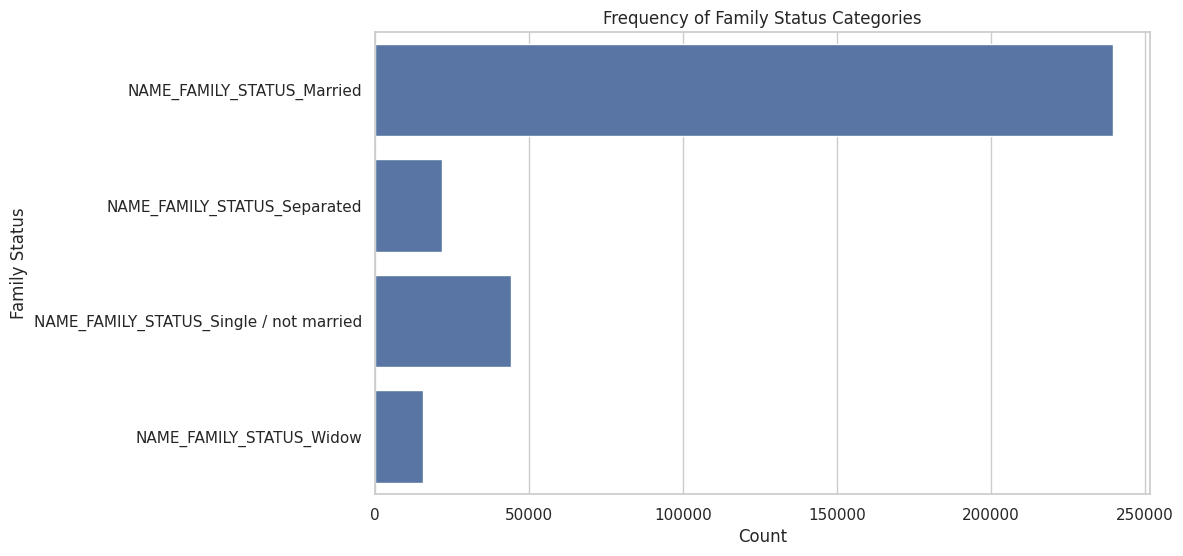

In [ ]:
# 5. Bar Plot for One-Hot Encoded Features (Family Status)
family_status_cols = [col for col in one_hot_columns if 'NAME_FAMILY_STATUS_' in col]
family_status_counts = X_train[family_status_cols].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=family_status_counts.values, y=family_status_counts.index)
plt.title('Frequency of Family Status Categories')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.show()

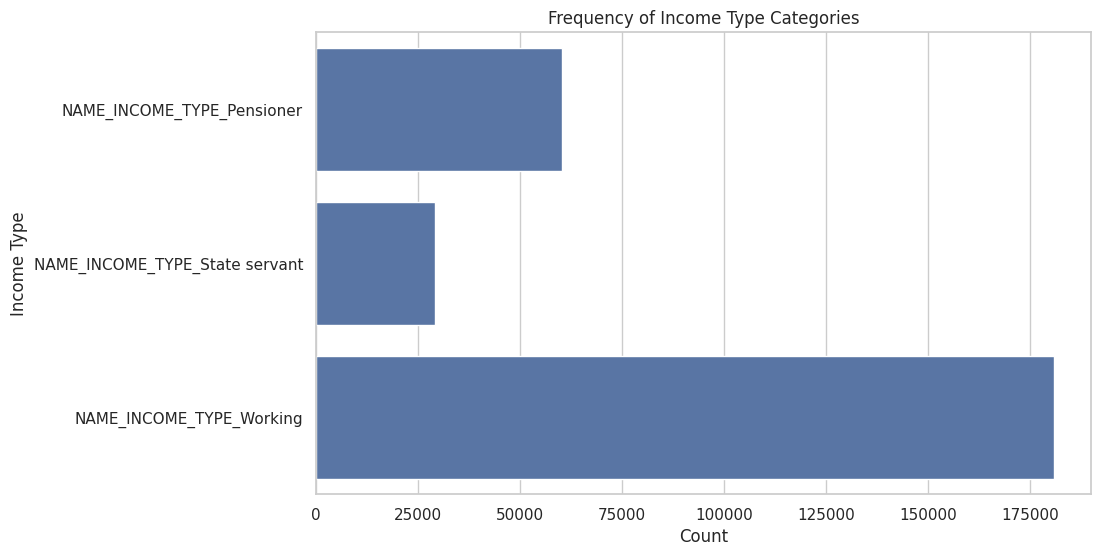

In [ ]:
# 6. Bar Plot for One-Hot Encoded Features (Income Type)
income_type_cols = [col for col in one_hot_columns if 'NAME_INCOME_TYPE_' in col]
income_type_counts = X_train[income_type_cols].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=income_type_counts.values, y=income_type_counts.index)
plt.title('Frequency of Income Type Categories')
plt.xlabel('Count')
plt.ylabel('Income Type')
plt.show()

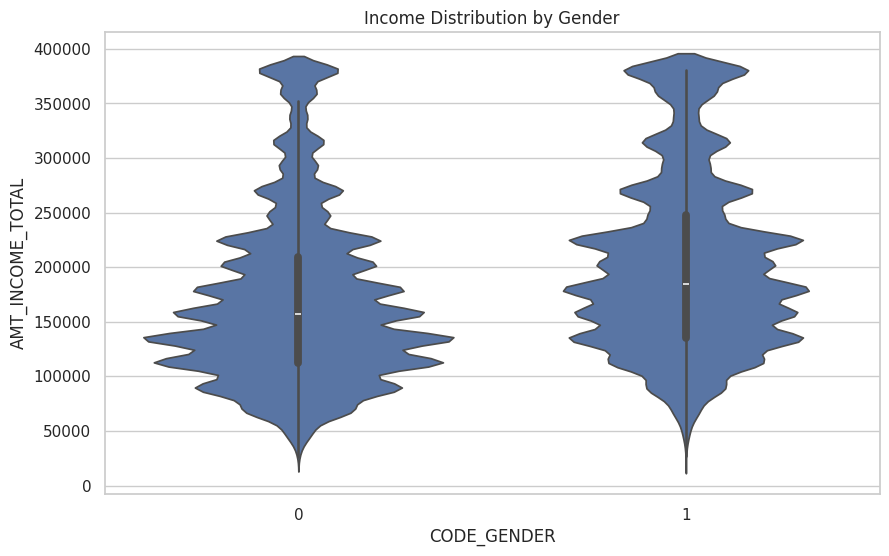

In [ ]:
#Violin Plot: AMT_INCOME_TOTAL by CODE_GENDER
plt.figure(figsize=(10, 6))
sns.violinplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=X_train)
plt.title('Income Distribution by Gender')
plt.xlabel('CODE_GENDER')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

## Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns= X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns= X_test_encoded.columns)

In [ ]:
X_train_scaled.describe()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,SKILL_LEVEL_encoded,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
count,350533.000000,350533.000000,350533.000000,350533.000000,350533.000000,350533.000000,350533.000000,350533.000000,350533.0,350533.0,...,350533.000000,350533.000000,350533.000000,350533.000000,350533.000000,350533.00000,350533.000000,350533.000000,350533.000000,350533.000000
mean,0.328594,0.372193,0.693290,0.167539,0.440066,0.520288,0.525613,0.752507,0.0,0.0,...,0.683605,0.062026,0.126305,0.044846,0.477868,0.89771,0.032553,0.008884,0.013602,0.043725
std,0.469703,0.483390,0.461129,0.276338,0.228185,0.298345,0.238792,0.152351,0.0,0.0,...,0.465070,0.241202,0.332193,0.206966,0.327171,0.30303,0.177465,0.093833,0.115832,0.204483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.269377,0.333333,0.327056,0.678803,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.500000,1.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.371029,0.333333,0.546653,0.755621,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.500000,1.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.400000,0.561626,1.000000,0.724248,0.807131,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.500000,1.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_scaled.shape

(350533, 30)

In [ ]:
y_train_numeric.shape

(350533,)

In [ ]:
X_test_scaled.shape

(87648, 30)

In [ ]:
X_test_scaled.isna().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_EDUCATION_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
FLAG_MOBIL,0
FLAG_WORK_PHONE,0


In [ ]:
median_value = X_test_scaled["SKILL_LEVEL_encoded"].median()
X_test_scaled["SKILL_LEVEL_encoded"].fillna(median_value,inplace = True)

<ipython-input-124-5ce544f81258>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_scaled["SKILL_LEVEL_encoded"].fillna(median_value,inplace = True)


In [ ]:
X_test_scaled.isna().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_EDUCATION_TYPE,0
DAYS_BIRTH,0
DAYS_EMPLOYED,0
FLAG_MOBIL,0
FLAG_WORK_PHONE,0


## Fixing the Issue of imbalance data

In [ ]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy = "auto",random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train_scaled,y_train_numeric)

<ipython-input-127-f0742b210216>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_after_resample.index, y=class_counts_after_resample.values, palette=["blue", "red"])


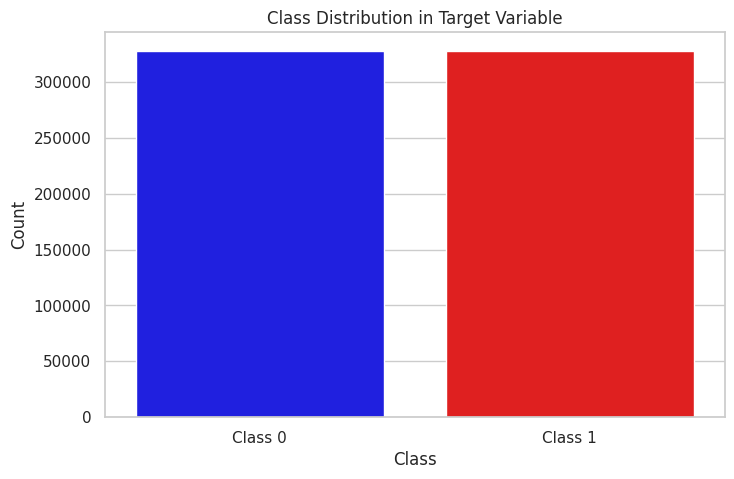

In [ ]:

# Count the number of occurrences of each class
class_counts_after_resample = y_train_resampled.value_counts()

# Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts_after_resample.index, y=class_counts_after_resample.values, palette=["blue", "red"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.show()

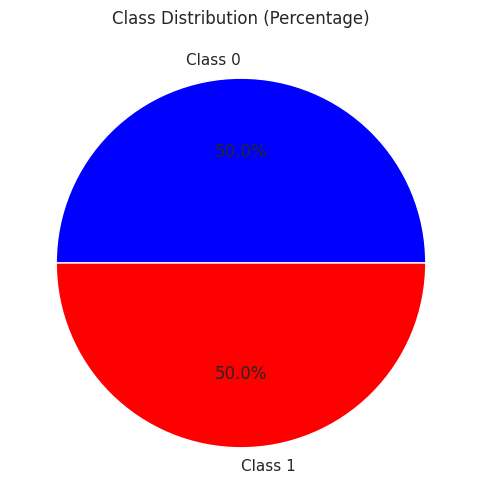

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts_after_resample, labels=["Class 0", "Class 1"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Class Distribution (Percentage)")
plt.show()

## Building Machine learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
y_test.unique()

array(['good', 'bad'], dtype=object)

In [ ]:
# Initialize lists to store results and ROC data
results = []
roc_data = {}

In [ ]:
# 1. Logistic Regression
from sklearn.model_selection import GridSearchCV
print("Training Logistic Regression...")
lr_model = LogisticRegression(penalty="l1",random_state=42,)
lr_param_grid = {
    "max_iter" :[100,140,170],
    'C': [0.1, 0.08, 0.05],
    'solver': ['lbfgs',"saga"],

}
lr_grid = GridSearchCV(lr_model, lr_param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
lr_grid.fit(X_train_resampled, y_train_resampled)
lr_grid.best_estimator_


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')

In [ ]:
lr_grid.best_params_

{'C': 0.1, 'max_iter': 100, 'solver': 'saga'}

In [ ]:
# Evaluate
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test_scaled)

y_prob_lr = lr_best.predict_proba(X_test_scaled)[:, 1]
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test_numeric, y_pred_lr),
    'Precision': precision_score(y_test_numeric, y_pred_lr, average='weighted'),
    'Recall': recall_score(y_test_numeric, y_pred_lr, average='weighted'),
    'F1-Score': f1_score(y_test_numeric, y_pred_lr, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test_numeric, y_prob_lr)
})
fpr_lr, tpr_lr, _ = roc_curve(y_test_numeric, y_prob_lr)
roc_data['Logistic Regression'] = (fpr_lr, tpr_lr, roc_auc_score(y_test_numeric, y_prob_lr))
print("Logistic Regression Best Params:", lr_grid.best_params_)

Logistic Regression Best Params: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}


In [ ]:
pd.DataFrame([results[-1]]).to_csv('logistic_regression_metrics.csv', index=False)

In [ ]:
# 2. Linear SVM
from sklearn.svm import LinearSVC
print("Training Linear SVM...")
svm_model = LinearSVC(max_iter=1000,random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10]
}
svm_grid = GridSearchCV(svm_model ,svm_param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
svm_grid.fit(X_train_resampled, y_train_resampled)

Training Linear SVM...


GridSearchCV(cv=3, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10]}, scoring='f1_weighted')

In [ ]:
# Evaluate (LinearSVC doesn't have predict_proba, use decision_function)
svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test_scaled)

y_decision_svm = svm_best.decision_function(X_test_scaled)
results.append({
    'Model': 'Linear SVM',
    'Accuracy': accuracy_score(y_test_numeric, y_pred_svm),
    'Precision': precision_score(y_test_numeric, y_pred_svm, average='weighted'),
    'Recall': recall_score(y_test_numeric, y_pred_svm, average='weighted'),
    'F1-Score': f1_score(y_test_numeric, y_pred_svm, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test_numeric, y_decision_svm)
})
fpr_svm, tpr_svm, _ = roc_curve(y_test_numeric, y_decision_svm)
roc_data['Linear SVM'] = (fpr_svm, tpr_svm, roc_auc_score(y_test_numeric, y_decision_svm))
print("Linear SVM Best Params:", svm_grid.best_params_)
pd.DataFrame([results[-1]]).to_csv('linear_svm_metrics.csv', index=False)

Linear SVM Best Params: {'C': 1}


In [ ]:
# 3. Random Forest
print("Training Random Forest...")
rf = RandomForestClassifier(random_state=42,
                            n_jobs=-1,
                            n_estimators=200,
                            max_depth=15,
                            min_samples_split=2,
                            min_samples_leaf=2,
                            criterion="log_loss")

rf.fit(X_train_resampled, y_train_resampled)

Training Random Forest...


RandomForestClassifier(criterion='log_loss', max_depth=15, min_samples_leaf=2,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
# Evaluate
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test_numeric, y_pred_rf),
    'Precision': precision_score(y_test_numeric, y_pred_rf, average='weighted'),
    'Recall': recall_score(y_test_numeric, y_pred_rf, average='weighted'),
    'F1-Score': f1_score(y_test_numeric, y_pred_rf, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test_numeric, y_prob_rf)
})
fpr_rf, tpr_rf, _ = roc_curve(y_test_numeric, y_prob_rf)
roc_data['Random Forest'] = (fpr_rf, tpr_rf, roc_auc_score(y_test_numeric, y_prob_rf))
print("Random Forest Best Params:", rf.get_params())

Random Forest Best Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
pd.DataFrame([results[-1]]).to_csv('random_forest_metrics.csv', index=False)

In [ ]:
# 4. XGBoost
print("Training XGBoost...")
xgb = XGBClassifier(use_label_encoder=False,
                    eval_metric='logloss',
                    random_state=42,
                    n_estimators = 300,
                    max_depth = 10,
                    learning_rate=0.2,
                    subsample=0.5,
                    n_jobs=-1)


xgb.fit(X_train_resampled, y_train_resampled)

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [ ]:

# Evaluate
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test_numeric, y_pred_xgb),
    'Precision': precision_score(y_test_numeric, y_pred_xgb, average='weighted'),
    'Recall': recall_score(y_test_numeric, y_pred_xgb, average='weighted'),
    'F1-Score': f1_score(y_test_numeric, y_pred_xgb, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test_numeric, y_prob_xgb)
})
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_numeric, y_prob_xgb)
roc_data['XGBoost'] = (fpr_xgb, tpr_xgb, roc_auc_score(y_test_numeric, y_prob_xgb))
print("XGBoost Best Params:", xgb.get_params())


XGBoost Best Params: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 10, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 300, 'n_jobs': -1, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


In [ ]:
pd.DataFrame([results[-1]]).to_csv('xgboost_metrics.csv', index=False)

## Classification Report of all models

In [ ]:
# Combine Results
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)
results_df.to_csv('model_comparison_metrics.csv', index=False)



Model Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.533087   0.882958  0.533087  0.646291  0.520251
1           Linear SVM  0.532551   0.882838  0.532551  0.645840  0.520234
2        Random Forest  0.755933   0.916760  0.755933  0.815574  0.781256
3              XGBoost  0.935663   0.949971  0.935663  0.941192  0.896272


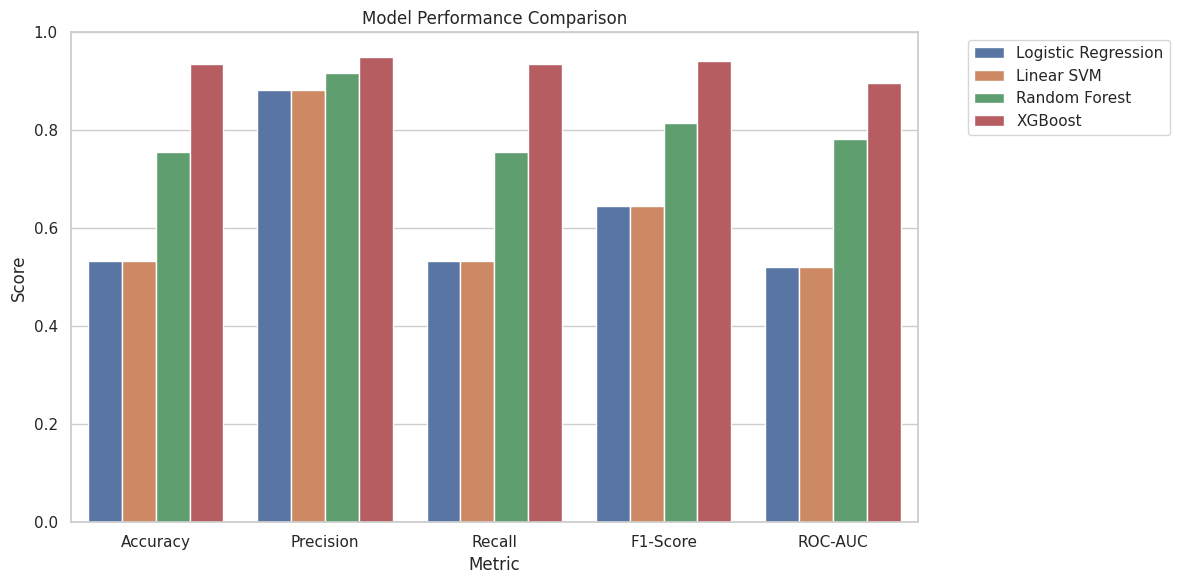

In [ ]:
# Plot 1: Bar Plot for Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
results_melted = results_df.melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melted)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Plot ROC Curves

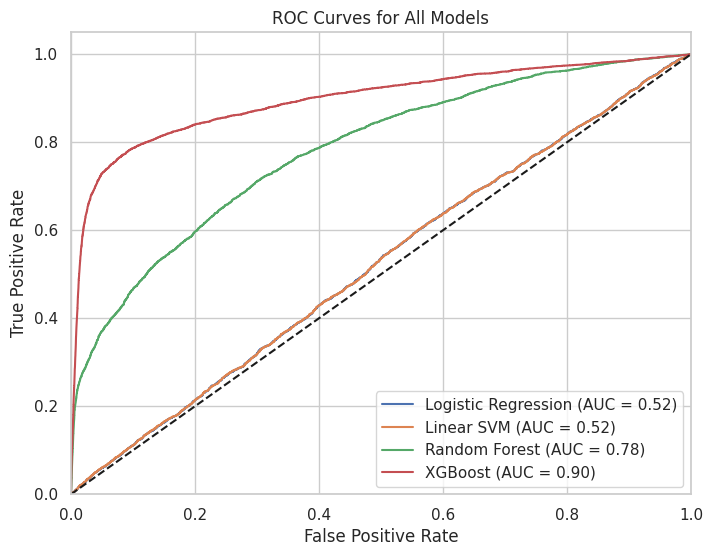

In [ ]:
# Plot 2: ROC Curves
plt.figure(figsize=(8, 6))
for model_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

## Building a neural network using Pytorch

In [ ]:
import numpy as np
print("Training set shape:", X_train_scaled.shape)
print("Class distribution:", np.bincount(y_train_numeric))

Training set shape: (350533, 30)
Class distribution: [328071  22462]


In [ ]:
# Try SmoteENN to solve the problem of imabalance for the nn
from imblearn.combine import SMOTEENN
X_subset, _, y_subset, _ = train_test_split(X_train_scaled, y_train_numeric, train_size=0.1, stratify=y_train_numeric, random_state=42)
smote_enn = SMOTEENN(sampling_strategy=0.5,random_state=42)
X_train_resampled_enn , y_train_resampled_enn = smote_enn.fit_resample(X_subset,y_subset)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Split the training data into train and validation sets (80% train, 20% validation)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [ ]:
# Split the training data into train and validation sets (80% train, 20% validation)
X_train_final_enn, X_val_enn, y_train_final_enn, y_val_enn = train_test_split(
    X_train_resampled_enn, y_train_resampled_enn, test_size=0.2, random_state=42)

In [ ]:
X_train_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,SKILL_LEVEL_encoded,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0.0,0.0,1.0,0.0,0.307497,0.333333,0.868516,0.760420,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.4,0.243964,0.333333,0.759687,0.789444,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.815756,1.000000,0.639331,0.785916,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.402795,0.333333,0.950693,0.784928,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.4,0.752224,1.000000,0.720881,0.668407,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350528,0.0,1.0,1.0,0.0,0.663278,1.000000,0.852993,0.770486,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
350529,0.0,0.0,1.0,0.0,0.561626,0.333333,0.177938,1.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0
350530,1.0,1.0,1.0,0.4,0.752224,1.000000,0.719397,0.732195,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0
350531,0.0,0.0,1.0,0.0,0.243964,0.333333,0.093934,1.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.5,1.0,0.0,0.0,0.0,0.0


## Convert Data to PyTorch Tensors

In [ ]:
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

In [ ]:
X_train_tensor_enn = torch.tensor(X_train_final_enn.values, dtype=torch.float32)
y_train_tensor_enn = torch.tensor(y_train_final_enn.values, dtype=torch.float32)

X_val_tensor_enn = torch.tensor(X_val_enn.values, dtype=torch.float32)
y_val_tensor_enn = torch.tensor(y_val_enn.values, dtype=torch.float32)

In [ ]:
y_train_tensor = y_train_tensor.view(-1, 1)  # Reshape to (N, 1)
y_val_tensor = y_val_tensor.view(-1, 1)  # Reshape validation target as well


In [ ]:
y_train_tensor_enn = y_train_tensor_enn.view(-1, 1)  # Reshape to (N, 1)
y_val_tensor_enn = y_val_tensor_enn.view(-1, 1)  # Reshape validation target as well



In [ ]:
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_numeric.values, dtype=torch.float32)

In [ ]:
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
val_dataset = TensorDataset(X_val_tensor,y_val_tensor)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle= True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [ ]:
train_dataset_enn = TensorDataset(X_train_tensor_enn,y_train_tensor_enn)
val_dataset_enn = TensorDataset(X_val_tensor_enn,y_val_tensor_enn)

train_loader_enn = DataLoader(train_dataset_enn,batch_size=64,shuffle= True)
val_loader_enn = DataLoader(val_dataset_enn, batch_size=64, shuffle=False)


In [ ]:
train_dataset = TensorDataset(X_train_tensor,y_train_tensor)
val_dataset = TensorDataset(X_val_tensor,y_val_tensor)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle= True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
train_dataset_enn = TensorDataset(X_train_tensor_enn,y_train_tensor_enn)
val_dataset_enn = TensorDataset(X_val_tensor_enn,y_val_tensor_enn)

train_loader_enn = DataLoader(train_dataset_enn,batch_size=64,shuffle= True)
val_loader_enn = DataLoader(val_dataset_enn, batch_size=64, shuffle=False)

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
           nn.Linear(input_size,256),# First hidden layer
           nn.BatchNorm1d(256),
           nn.ReLU(),
           nn.Dropout(0.3),
           nn.Linear(256,128),
           nn.BatchNorm1d(128),
           nn.ReLU(),
           nn.Dropout(0.3),
           nn.Linear(128,64),
           nn.ReLU(),
           nn.Linear(64,1),# Output layer
           nn.Sigmoid() # Sigmoid activation for binary classification

        )

    def forward(self, x):
        return self.layers(x)

# Initialize the model
input_size = X_train_tensor.shape[1]
model = NeuralNet(input_size)

In [ ]:
import torch
import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = nn.BCEWithLogitsLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return focal_loss.mean()



In [ ]:
criterion = FocalLoss(alpha=0.75, gamma=2.0)  # Tune alpha for class 1
optimizer = optim.Adam(model.parameters(), lr=0.001,weight_decay = 1e-5)


In [ ]:
print(model)


NeuralNet(
  (layers): Sequential(
    (0): Linear(in_features=30, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=1, bias=True)
    (11): Sigmoid()
  )
)


In [ ]:
# Early Stopping Parameters
patience =  5 # Stop training if no improvement for 5 epochs
best_val_loss = float("inf")  # Track the best validation loss
epochs_no_improve = 0  # Count epochs without improvement

num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()

    # Forward pass
    y_train_pred = model(X_train_tensor)
    loss = criterion(y_train_pred, y_train_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Evaluate on validation set
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val_loss = criterion(y_val_pred, y_val_tensor)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Early Stopping Logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss  # Update best validation loss
        epochs_no_improve = 0  # Reset patience counter
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        epochs_no_improve += 1  # Increment patience counter

    if epochs_no_improve == patience:
        print("Early stopping triggered! Stopping training.")
        break  # Stop training

# Load the best model
model.load_state_dict(torch.load("best_model.pth"))
print("Best model loaded.")

Epoch 1/50, Train Loss: 0.1704, Validation Loss: 0.1663
Epoch 2/50, Train Loss: 0.1656, Validation Loss: 0.1657
Epoch 3/50, Train Loss: 0.1613, Validation Loss: 0.1651
Epoch 4/50, Train Loss: 0.1574, Validation Loss: 0.1643
Epoch 5/50, Train Loss: 0.1539, Validation Loss: 0.1635
Epoch 6/50, Train Loss: 0.1508, Validation Loss: 0.1624
Epoch 7/50, Train Loss: 0.1480, Validation Loss: 0.1613
Epoch 8/50, Train Loss: 0.1455, Validation Loss: 0.1599
Epoch 9/50, Train Loss: 0.1434, Validation Loss: 0.1584
Epoch 10/50, Train Loss: 0.1414, Validation Loss: 0.1568
Epoch 11/50, Train Loss: 0.1397, Validation Loss: 0.1550
Epoch 12/50, Train Loss: 0.1383, Validation Loss: 0.1531
Epoch 13/50, Train Loss: 0.1370, Validation Loss: 0.1512
Epoch 14/50, Train Loss: 0.1359, Validation Loss: 0.1492
Epoch 15/50, Train Loss: 0.1349, Validation Loss: 0.1473
Epoch 16/50, Train Loss: 0.1341, Validation Loss: 0.1454
Epoch 17/50, Train Loss: 0.1334, Validation Loss: 0.1436
Epoch 18/50, Train Loss: 0.1328, Validat

Define loss function


Train the model


In [ ]:
# Early Stopping Parameters
patience =  5 # Stop training if no improvement for 5 epochs
best_val_loss = float("inf")  # Track the best validation loss
epochs_no_improve = 0  # Count epochs without improvement

num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()

    # Forward pass
    y_train_pred_enn = model(X_train_tensor_enn)
    loss = criterion(y_train_pred_enn, y_train_tensor_enn)

    # Backward pass
    loss.backward()
    optimizer.step()

    # Evaluate on validation set
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        y_val_pred = model(X_val_tensor_enn)
        val_loss = criterion(y_val_pred, y_val_tensor_enn)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Early Stopping Logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss  # Update best validation loss
        epochs_no_improve = 0  # Reset patience counter
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        epochs_no_improve += 1  # Increment patience counter

    if epochs_no_improve == patience:
        print("Early stopping triggered! Stopping training.")
        break  # Stop training

# Load the best model
model.load_state_dict(torch.load("best_model.pth"))
print("Best model loaded.")

Epoch 1/50, Train Loss: 0.1320, Validation Loss: 0.1327
Epoch 2/50, Train Loss: 0.1320, Validation Loss: 0.1325
Epoch 3/50, Train Loss: 0.1319, Validation Loss: 0.1323
Epoch 4/50, Train Loss: 0.1318, Validation Loss: 0.1321
Epoch 5/50, Train Loss: 0.1317, Validation Loss: 0.1319
Epoch 6/50, Train Loss: 0.1315, Validation Loss: 0.1317
Epoch 7/50, Train Loss: 0.1314, Validation Loss: 0.1316
Epoch 8/50, Train Loss: 0.1313, Validation Loss: 0.1314
Epoch 9/50, Train Loss: 0.1312, Validation Loss: 0.1313
Epoch 10/50, Train Loss: 0.1311, Validation Loss: 0.1311
Epoch 11/50, Train Loss: 0.1310, Validation Loss: 0.1310
Epoch 12/50, Train Loss: 0.1310, Validation Loss: 0.1309
Epoch 13/50, Train Loss: 0.1308, Validation Loss: 0.1308
Epoch 14/50, Train Loss: 0.1308, Validation Loss: 0.1308
Epoch 15/50, Train Loss: 0.1307, Validation Loss: 0.1307
Epoch 16/50, Train Loss: 0.1306, Validation Loss: 0.1306
Epoch 17/50, Train Loss: 0.1306, Validation Loss: 0.1306
Epoch 18/50, Train Loss: 0.1305, Validat

In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = model(X_val_tensor).detach().numpy()
y_val_pred = (y_val_pred > 0.2).astype(int)  # Convert probabilities to binary labels
accuracy = accuracy_score(y_val.values, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

#Validation Accuracy: 0.9357

Validation Accuracy: 0.5052


In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred_enn = model(X_val_tensor_enn).detach().numpy()
y_val_pred_enn = (y_val_pred_enn > 0.2).astype(int)  # Convert probabilities to binary labels
accuracy_enn = accuracy_score(y_val_enn.values, y_val_pred_enn)
print(f"Validation Accuracy: {accuracy_enn:.4f}")

#Validation Accuracy: 0.9357_enn

Validation Accuracy: 0.7046


In [ ]:
y_test_pred = model(X_test_tensor).detach().numpy()
y_test_pred = (y_test_pred > 0.2).astype(int)  # Convert probabilities to binary labels
accuracy = accuracy_score(y_test_numeric.values, y_test_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9297


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.50      0.99      0.67     65494
           1       0.72      0.02      0.04     65735

    accuracy                           0.51    131229
   macro avg       0.61      0.51      0.35    131229
weighted avg       0.61      0.51      0.35    131229



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val_enn, y_val_pred_enn))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      5074
           1       0.89      0.05      0.10      2269

    accuracy                           0.70      7343
   macro avg       0.80      0.52      0.46      7343
weighted avg       0.76      0.70      0.60      7343



In [ ]:
print(classification_report(y_test_numeric, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     82030
           1       0.12      0.02      0.03      5618

    accuracy                           0.93     87648
   macro avg       0.53      0.50      0.50     87648
weighted avg       0.88      0.93      0.90     87648



In [ ]:
# Evaluate test set performance
y_test_pred_proba = model(X_test_tensor).detach().numpy()  # Probabilities
y_test_pred = (y_test_pred_proba > 0.5).astype(int)  # Binary predictions

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and optimal threshold
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_test_pred_proba)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}, ROC AUC: {roc_auc}")

Optimal threshold: 0.13282664120197296, ROC AUC: 0.5355967112033052


In [ ]:
np.shape(y_test_numeric)

(87648,)

In [ ]:
np.shape(X_test_scaled)

(87648, 30)